<a href="https://colab.research.google.com/github/h0velian/Application-of-certain-algorithms-in-network-programs/blob/main/algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import deque

def bfs(grid, start, goal):
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, 1), (1, -1)]
    queue = deque([(start[0], start[1], [])])
    visited = set([start])

    while queue:
        r, c, path = queue.popleft()
        new_path = path + [(r, c)]

        if (r, c) == goal:  # Fixed: Used '==' instead of '='
            return new_path

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < len(grid) and 0 <= nc <= nr and (nr, nc) not in visited and grid[nr][nc] == 0:
                visited.add((nr, nc))
                queue.append((nr, nc, new_path))

    return None  # Return None if no path is found



Ամենակարճ ուղի (5, -5) → (-5, 5) :
(5, -5) ➝ (5, -4) ➝ (4, -3) ➝ (3, -2) ➝ (3, -1) ➝ (2, 0) ➝ (1, 0) ➝ (1, -1) ➝ (0, -1) ➝ (-1, 0) ➝ (-2, 1) ➝ (-3, 2) ➝ (-4, 3) ➝ (-4, 4) ➝ (-5, 4) ➝ (-5, 5)
Ընդհանուր քաշը: 34


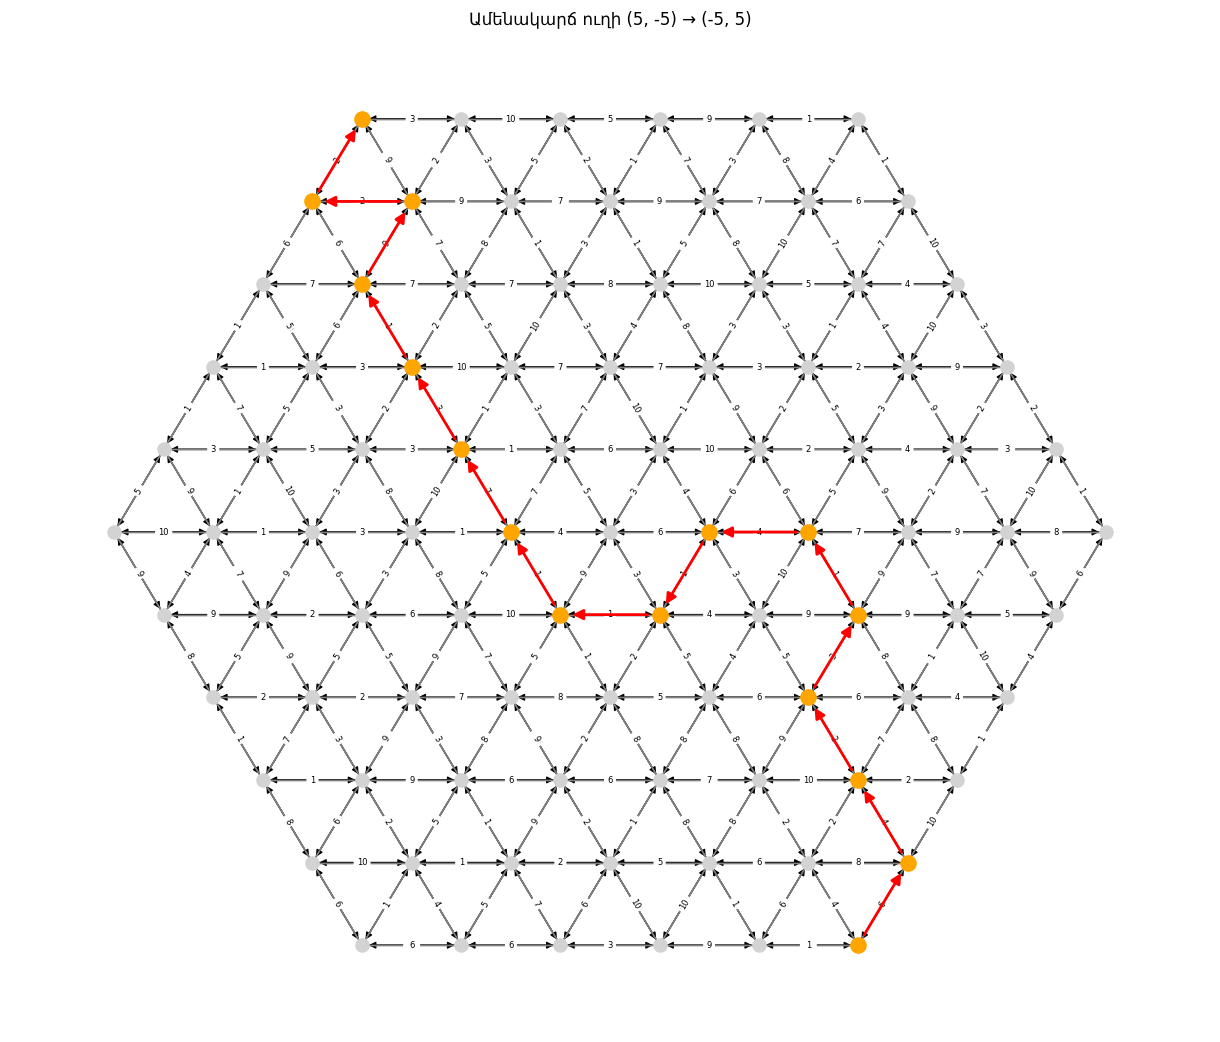

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_hex_grid_graph(n):
    G = nx.DiGraph()
    positions = {}
    for q in range(-n, n + 1):
        r1 = max(-n, -q - n)
        r2 = min(n, -q + n)
        for r in range(r1, r2 + 1):
            node = (q, r)
            G.add_node(node)
            positions[node] = (q + r/2, r * np.sqrt(3)/2)

    directions = [(1, 0), (0, 1), (-1, 1),
                  (-1, 0), (0, -1), (1, -1)]

    for node in G.nodes:
        for dx, dy in directions:
            neighbor = (node[0] + dx, node[1] + dy)
            if neighbor in G.nodes:
                weight = np.random.randint(1, 11)
                G.add_edge(node, neighbor, weight=weight)

    return G, positions

def draw_shortest_path_with_all_weights(G, pos, source, target):
    # Դեյկստրայի ամենակարճ ուղի
    path = nx.dijkstra_path(G, source, target, weight='weight')
    total_weight = nx.dijkstra_path_length(G, source, target, weight='weight')
    print(f"Ամենակարճ ուղի {source} → {target} :")
    print(" ➝ ".join(map(str, path)))
    print(f"Ընդհանուր քաշը: {total_weight}")

    edge_path = [(path[i], path[i+1]) for i in range(len(path)-1)]

    plt.figure(figsize=(12, 10))

    # Բոլոր գծերը՝ բաց գույնով
    nx.draw(G, pos, node_color='lightgray', node_size=90, with_labels=False)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=False, width=1)

    # Բոլոր քաշերը՝ ցանցի վրա
    all_edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=all_edge_labels, font_size=6)

    # Ամենակարճ ուղու գագաթները և սլաքները
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=120)
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='red', arrows=True, arrowsize=15, width=2)

    plt.title(f"Ամենակարճ ուղի {source} → {target}")
    plt.axis('off')
    plt.show()

# Սկսում ենք
radius = 5
G, pos = create_hex_grid_graph(radius)

# Ընտրում ենք աջ ներքևը և ձախ վերևը
source = (radius, -radius)
target = (-radius, radius)

draw_shortest_path_with_all_weights(G, pos, source, target)




In [ ]:
import heapq  # Importing heapq for priority queue

def dijkstra(graph, start, goal):
    # graph should be a dictionary with nodes as keys and list of tuples (neighbor, weight) as values
    pq = [(0, start)]  # Priority queue (cost, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_node == goal:
            path = []
            while previous_nodes[current_node] is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.append(start)
            return path[::-1], distances[goal]

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return None  # Return None if no path is found



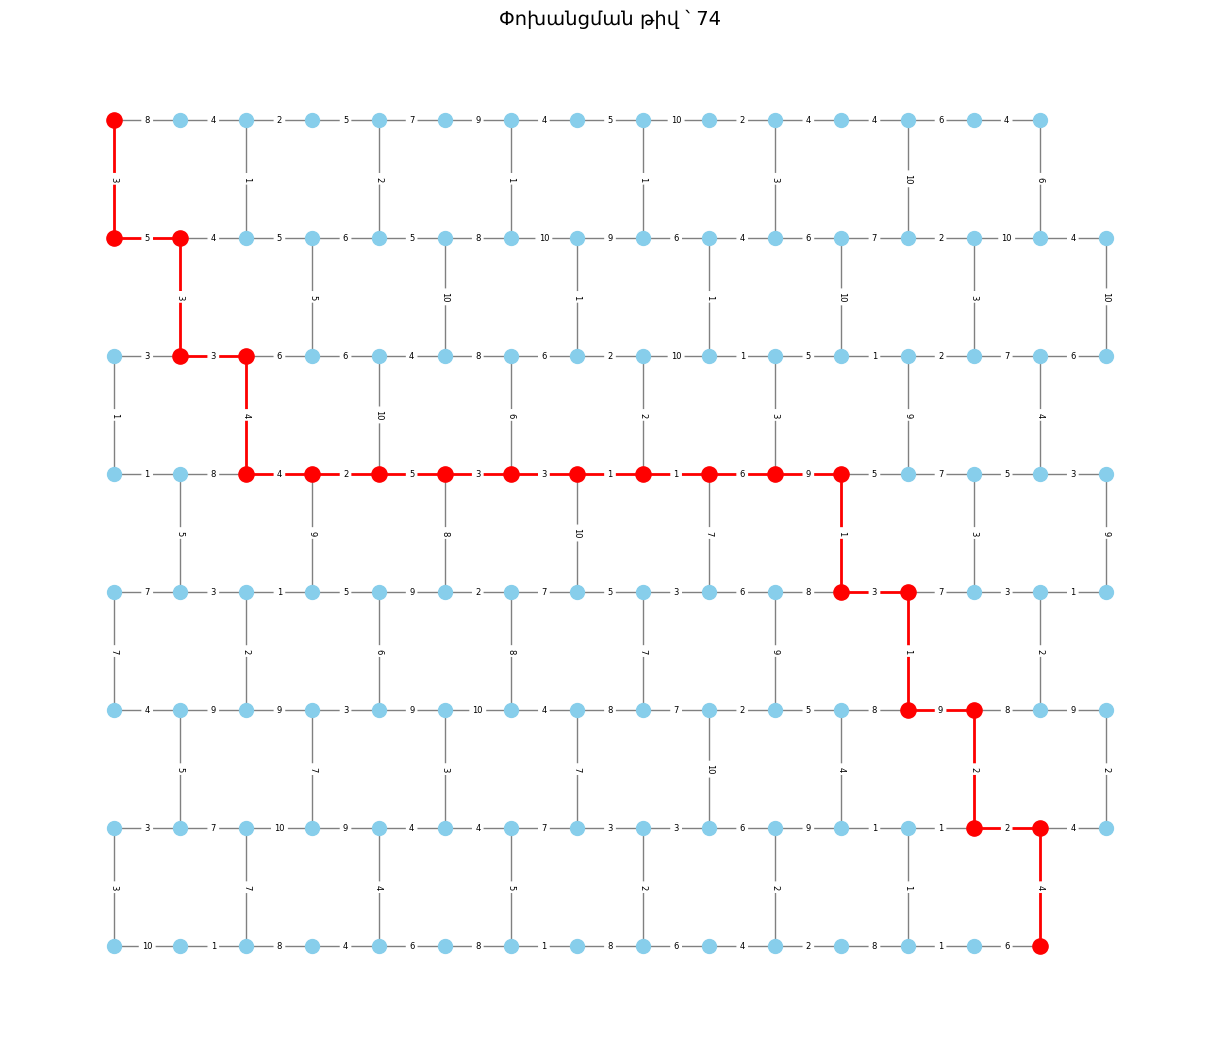

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Կառուցում ենք վեցանկյուն ցանց
rows, cols = 7, 7  # մոտավոր համաչափություն քո նկարի
G = nx.hexagonal_lattice_graph(rows, cols)

# Ավելացնում ենք պատահական քաշեր յուրաքանչյուր կողին
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Ստանում ենք բոլոր գագաթները
nodes = list(G.nodes())

# Սահմանում ենք սկիզբն ու վերջը
start = nodes[0]       # ձախ-ստորին գագաթ
end = nodes[-1]        # աջ-վերին գագաթ

# Դեյկստրայի ալգորիթմով գտնում ենք ամենակարճ ճանապարհը և քաշը
shortest_path = nx.dijkstra_path(G, start, end, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, start, end, weight='weight')

# Վիզուալիզացիայի համար դիրքավորում
pos = {(x, y): (y, -x) for x, y in G.nodes()}

# Նկարում ենք գրաֆը
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=False, node_size=100, node_color="skyblue", edge_color="gray")
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="red", node_size=120)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color="red", width=2)

# Ավելացնում ենք քաշերի ցուցադրություն
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Վերնագիր՝ ճանապարհի ընդհանուր քաշով
plt.title(f"Փոխանցման թիվ ՝ {shortest_path_length}", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
import heapq  # Importing heapq for priority queue

def a_star(graph, start, goal, heuristic):
    # graph is a dictionary where keys are nodes, and values are lists of (neighbor, weight) tuples
    pq = [(0 + heuristic(start, goal), 0, start)]  # (f, g, node)
    f_score = {start: heuristic(start, goal)}
    g_score = {start: 0}
    came_from = {start: None}

    while pq:
        _, current_g, current_node = heapq.heappop(pq)

        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = came_from[current_node]
            return path[::-1]

        for neighbor, weight in graph[current_node]:
            tentative_g_score = current_g + weight
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(pq, (f_score[neighbor], tentative_g_score, neighbor))

    return None  # Return None if no path is found

# Manhattan distance heuristic function for grids
def heuristic(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])


In [ ]:
def bellman_ford(graph, start, goal):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor, weight in graph[node]:
                if distances[node] + weight < distances[neighbor]:
                    distances[neighbor] = distances[node] + weight
                    previous_nodes[neighbor] = node
    for node in graph:
        for neighbor, weight in graph[node]:
            if distances[node] + weight < distances[neighbor]:
                return None  # Negative weight cycle detected
    path = []
    current_node = goal
    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    return path[::-1], distances[goal]


In [ ]:
def floyd_warshall(graph):
    dist = {u: {v: float('inf') for v in graph} for u in graph}
    for u in graph:
        dist[u][u] = 0
        for v, weight in graph[u].items():
            dist[u][v] = weight
    for k in graph:
        for i in graph:
            for j in graph:
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}
distances = floyd_warshall(graph)
print(distances['A']['D'])  # Output the shortest distance from A to D


4


In [ ]:
from collections import deque

def lee_algorithm(graph, start):
    # Initialize distances as infinity for all vertices
    distance = {node: float('inf') for node in graph}
    distance[start] = 0  # Distance to itself is 0
    queue = deque([start])  # Queue for BFS

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distance[neighbor] == float('inf'):  # If the neighbor hasn't been visited
                distance[neighbor] = distance[current] + 1  # Set the distance
                queue.append(neighbor)

    return distance

def transmission_numbers(graph):
    T_values = {}
    for node in graph:
        distances = lee_algorithm(graph, node)  # Get distances from this node to all other nodes
        print(f"Distances from vertex {node}: {distances}")  # Debugging line
        T_values[node] = sum(distances.values())  # Sum of distances gives the transmission number

    return T_values

# Define the edges of the graph (as given in the problem)
edges = {(1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (5, 6), (5, 7), (7, 8),
         (8, 9), (8, 13), (8, 14), (7, 10), (7, 12), (11, 12)}

# Build the adjacency list from the edges
graph = {}
for u, v in edges:
    if u not in graph:
        graph[u] = []
    if v not in graph:
        graph[v] = []
    graph[u].append(v)
    graph[v].append(u)

# Calculate the transmission numbers for each vertex
T_values = transmission_numbers(graph)

# Print the transmission numbers
print("Transmission numbers:", T_values)


Distances from vertex 8: {8: 0, 14: 1, 3: 3, 4: 3, 7: 1, 10: 2, 5: 2, 2: 4, 13: 1, 9: 1, 12: 2, 6: 3, 11: 3, 1: 4}
Distances from vertex 14: {8: 1, 14: 0, 3: 4, 4: 4, 7: 2, 10: 3, 5: 3, 2: 5, 13: 2, 9: 2, 12: 3, 6: 4, 11: 4, 1: 5}
Distances from vertex 3: {8: 3, 14: 4, 3: 0, 4: 1, 7: 2, 10: 3, 5: 1, 2: 1, 13: 4, 9: 4, 12: 3, 6: 2, 11: 4, 1: 1}
Distances from vertex 4: {8: 3, 14: 4, 3: 1, 4: 0, 7: 2, 10: 3, 5: 1, 2: 2, 13: 4, 9: 4, 12: 3, 6: 2, 11: 4, 1: 2}
Distances from vertex 7: {8: 1, 14: 2, 3: 2, 4: 2, 7: 0, 10: 1, 5: 1, 2: 3, 13: 2, 9: 2, 12: 1, 6: 2, 11: 2, 1: 3}
Distances from vertex 10: {8: 2, 14: 3, 3: 3, 4: 3, 7: 1, 10: 0, 5: 2, 2: 4, 13: 3, 9: 3, 12: 2, 6: 3, 11: 3, 1: 4}
Distances from vertex 5: {8: 2, 14: 3, 3: 1, 4: 1, 7: 1, 10: 2, 5: 0, 2: 2, 13: 3, 9: 3, 12: 2, 6: 1, 11: 3, 1: 2}
Distances from vertex 2: {8: 4, 14: 5, 3: 1, 4: 2, 7: 3, 10: 4, 5: 2, 2: 0, 13: 5, 9: 5, 12: 4, 6: 3, 11: 5, 1: 2}
Distances from vertex 13: {8: 1, 14: 2, 3: 4, 4: 4, 7: 2, 10: 3, 5: 3, 2: 5, 1

In [ ]:

import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity and set the distance to the start node to 0
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    pq = [(0, start)]  # priority queue to explore nodes, storing (distance, node)

    while pq:
        current_dist, current_node = heapq.heappop(pq)

        # If the current distance is greater than the known distance, skip processing
        if current_dist > distances[current_node]:
            continue

        # Explore the neighbors of the current node
        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

def transmission_numbers(graph):
    T_values = {}
    for node in graph:
        distances = dijkstra(graph, node)
        T_values[node] = sum(distances.values())  # Sum of distances for the transmission number

    return T_values

# Graph representation based on the given edges and weights
edges = [
    (0, 1, 1), (0, 2, 1), (0, 8, 1),
    (1, 2, 1),
    (3, 0, 1),
    (4, 0, 1), (4, 5, 2), (4, 8, 1),
    (5, 6, 3),
    (6, 7, 2),
    (7, 4, 2),
    (8, 11, 2), (8, 9, 3),  # Updated with the missing edge (8, 9) = 2
    (10, 11, 2),
    (11, 12, 3), (11, 13, 3)
]

# Construct the adjacency list for the graph
graph = {}
for u, v, weight in edges:
    if u not in graph:
        graph[u] = []
    if v not in graph:
        graph[v] = []
    graph[u].append((v, weight))
    graph[v].append((u, weight))

# Calculate the transmission numbers for each vertex
T_values = transmission_numbers(graph)

# Print the transmission numbers
print("Transmission numbers:", T_values)


Transmission numbers: {0: 40, 1: 51, 2: 51, 8: 38, 3: 52, 4: 40, 5: 61, 6: 81, 7: 60, 11: 50, 9: 74, 10: 74, 12: 86, 13: 86}


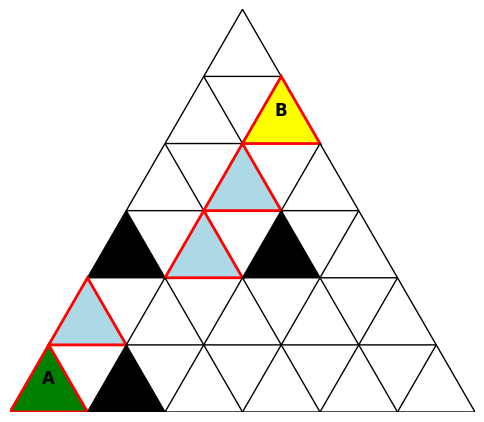

Համենակարճ ճամանադրը (4 գայլ): [(5, 0), (4, 0), (3, 1), (2, 1), (1, 1)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# ցանցի չափերը
N = 6  # շարքերի քանակը

def draw_triangle(ax, x, y, color='white', label=None, orientation='down', path=False):
    if orientation == 'down':
        triangle = np.array([[x, y], [x + 0.5, y + np.sqrt(3)/2], [x + 1, y]])
    else:
        triangle = np.array([[x + 0.5, y + np.sqrt(3)/2], [x, y], [x + 1, y]])

    if path:
        ax.fill(triangle[:, 0], triangle[:, 1], color=color, edgecolor='red', linewidth=2)
    else:
        ax.fill(triangle[:, 0], triangle[:, 1], color=color, edgecolor='black')

    if label:
        ax.text(x + 0.5, y + (np.sqrt(3)/4), label, fontsize=12, ha='center', va='center',
                color='black', weight='bold')

def visualize_grid(grid, start, goal, path=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, N)
    ax.set_ylim(0, N * np.sqrt(3)/2)
    ax.set_aspect('equal')
    ax.axis('off')

    for r in range(N):
        for c in range(r + 1):
            x, y = c + (N - r - 1) * 0.5, (N - r - 1) * np.sqrt(3)/2
            color = 'white'
            label = None

            if grid[r][c] == 1:
                color = 'black'
            elif (r, c) == start:
                color = 'green'
                label = 'A'
            elif (r, c) == goal:
                color = 'yellow'
                label = 'B'
            elif path and (r, c) in path:
                color = 'lightblue'

            draw_triangle(ax, x, y, color, label, orientation='down', path=(path and (r, c) in path))

    plt.show()

def bfs(grid, start, goal):
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, 1), (1, -1)]
    queue = deque([(start[0], start[1], [])])
    visited = set([start])

    while queue:
        r, c, path = queue.popleft()
        new_path = path + [(r, c)]

        if (r, c) == goal:
            return new_path

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < N and 0 <= nc <= nr and (nr, nc) not in visited and grid[nr][nc] == 0:
                visited.add((nr, nc))
                queue.append((nr, nc, new_path))

    return None  # Եթե ճանապարհ չկա

# Օրինակ ցանց (0 - անցանելի, 1 - արգելապատ)
grid = [
    [0],
    [0, 0],
    [0, 0, 0],
    [1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0]
]

start = (5, 0)  # A (Կանաչ կետ)
goal = (1, 1)   # B (Դեղին կետ)

shortest_path = bfs(grid, start, goal)

visualize_grid(grid, start, goal, shortest_path)

if shortest_path:
    print(f"Համենակարճ ճամանադրը ({len(shortest_path) - 1} գայլ): {shortest_path}")
else:
    print("Ճանապարհ չի գտնվելիքք")


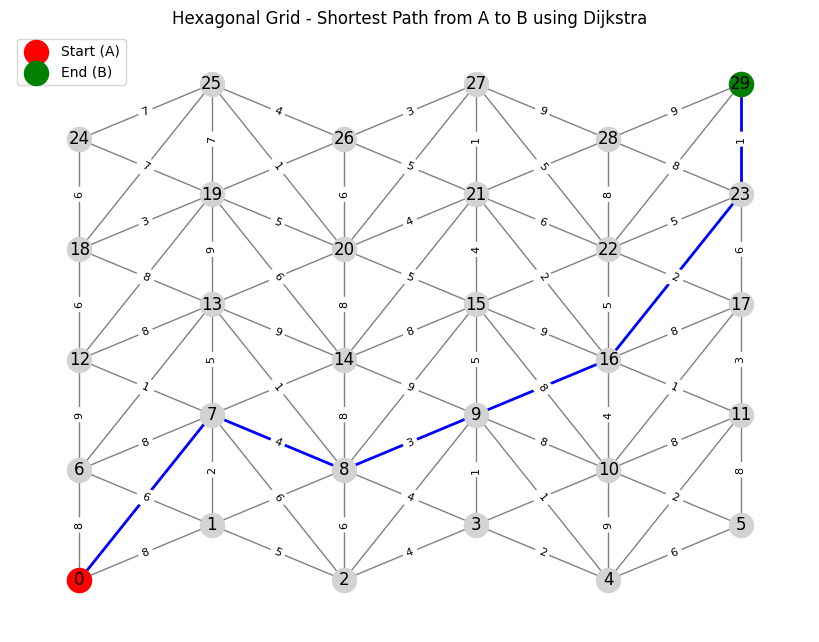

Shortest path from A to B: [0, 7, 8, 9, 16, 23, 29]
Total weight (cost) of the shortest path: 18


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a hexagonal grid graph with weighted edges
def create_hexagonal_graph(rows, cols):
    G = nx.Graph()
    positions = {}  # Store node positions

    # Hexagonal grid spacing
    dx = 1.5  # Horizontal distance between centers
    dy = np.sqrt(3)  # Vertical distance

    # Create nodes with hexagonal layout
    for row in range(rows):
        for col in range(cols):
            x = col * dx
            y = row * dy
            if col % 2 == 1:  # Offset for odd columns
                y += dy / 2
            node_id = row * cols + col
            G.add_node(node_id, pos=(x, y))
            positions[node_id] = (x, y)

    # Define possible moves in a hexagonal grid
    hex_moves = [
        (-1, 0), (1, 0),  # Left, Right
        (0, -1), (0, 1),  # Top, Bottom
        (-1, 1), (1, 1)   # Diagonal moves based on column parity
    ]

    # Add edges with random weights for now (adjustable for real data)
    for row in range(rows):
        for col in range(cols):
            node_id = row * cols + col
            for dr, dc in hex_moves:
                nr, nc = row + dr, col + dc
                if 0 <= nr < rows and 0 <= nc < cols:
                    neighbor_id = nr * cols + nc
                    weight = np.random.randint(1, 10)  # Assign random weights (1-9)
                    G.add_edge(node_id, neighbor_id, weight=weight)

    return G, positions

# Create the hexagonal grid graph
rows, cols = 5, 6  # Grid size
hex_G, hex_positions = create_hexagonal_graph(rows, cols)

# Define start (A) and end (B) nodes
start_node = 0    # Example position for 'A'
end_node = rows * cols - 1  # Example position for 'B'

# Compute the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.dijkstra_path(hex_G, source=start_node, target=end_node, weight='weight')
    shortest_path_length = nx.dijkstra_path_length(hex_G, source=start_node, target=end_node, weight='weight')
    shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))

    # Draw the hexagonal graph with shortest path highlighted
    plt.figure(figsize=(8, 6))
    nx.draw(hex_G, pos=hex_positions, with_labels=True, node_color='lightgray', edge_color='gray')
    nx.draw_networkx_nodes(hex_G, pos=hex_positions, nodelist=[start_node], node_color='red', label="Start (A)")
    nx.draw_networkx_nodes(hex_G, pos=hex_positions, nodelist=[end_node], node_color='green', label="End (B)")
    nx.draw_networkx_edges(hex_G, pos=hex_positions, edgelist=shortest_path_edges, edge_color='blue', width=2)

    # Show weights
    edge_labels = {(u, v): d['weight'] for u, v, d in hex_G.edges(data=True)}
    nx.draw_networkx_edge_labels(hex_G, pos=hex_positions, edge_labels=edge_labels, font_size=8)

    plt.title("Hexagonal Grid - Shortest Path from A to B using Dijkstra")
    plt.legend()
    plt.show()

    print(f"Shortest path from A to B: {shortest_path}")
    print(f"Total weight (cost) of the shortest path: {shortest_path_length}")

except nx.NetworkXNoPath:
    print("No path found between A and B.")



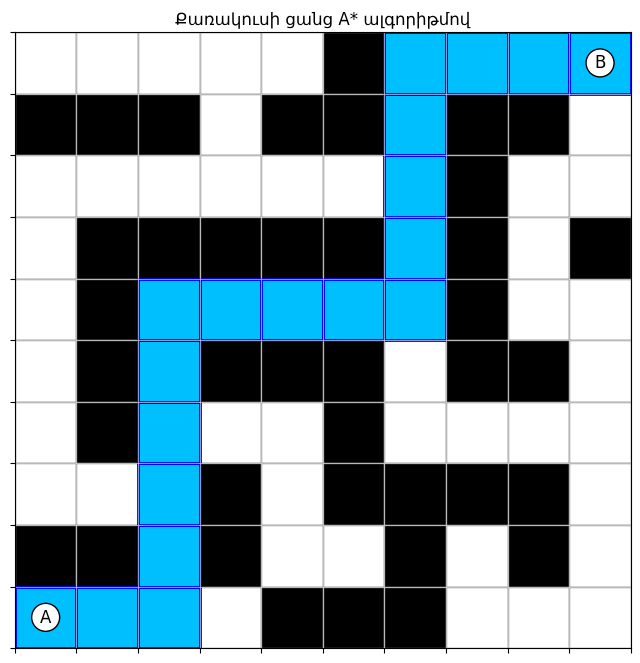

Ճանապարհ գտնվեց 18 քայլով։
Քայլերը՝ [(9, 0), (9, 1), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6), (0, 7), (0, 8), (0, 9)]


In [ ]:
import matplotlib.pyplot as plt
import heapq
import numpy as np

# Ցանցի տվյալներ
grid = [
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
    [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
]

start = (9, 0)
goal = (0, 9)
ROWS, COLS = len(grid), len(grid[0])

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan

def astar(grid, start, goal):
    heap = [(0 + heuristic(start, goal), 0, start, [])]
    visited = set()

    while heap:
        est_total_cost, cost, current, path = heapq.heappop(heap)
        if current in visited:
            continue
        visited.add(current)

        path = path + [current]
        if current == goal:
            return path

        r, c = current
        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < ROWS and 0 <= nc < COLS and grid[nr][nc] == 0:
                heapq.heappush(heap, (cost + 1 + heuristic((nr, nc), goal), cost + 1, (nr, nc), path))

    return None

def draw_grid(grid, path=None, start=None, goal=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    for r in range(ROWS):
        for c in range(COLS):
            color = 'white' if grid[r][c] == 0 else 'black'
            rect = plt.Rectangle((c, r), 1, 1, facecolor=color, edgecolor='gray', linewidth=1)
            ax.add_patch(rect)

    # Ճանապարհը՝ կապույտով
    if path:
        for r, c in path:
            rect = plt.Rectangle((c, r), 1, 1, facecolor='deepskyblue', edgecolor='blue', linewidth=2)
            ax.add_patch(rect)

    # Սկիզբ և վերջ
    if start:
        ax.text(start[1] + 0.5, start[0] + 0.5, 'A', ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=12)
    if goal:
        ax.text(goal[1] + 0.5, goal[0] + 0.5, 'B', ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=12)

    ax.set_xlim(0, COLS)
    ax.set_ylim(0, ROWS)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.set_xticks(np.arange(COLS + 1))
    ax.set_yticks(np.arange(ROWS + 1))
    ax.grid(True, which='both', color='lightgray', linewidth=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Քառակուսի ցանց A* ալգորիթմով")
    plt.show()

# Գտնել և ցուցադրել ճանապարհը
path = astar(grid, start, goal)
draw_grid(grid, path, start, goal)

if path:
    print(f"Ճանապարհ գտնվեց {len(path)-1} քայլով։")
    print("Քայլերը՝", path)
else:
    print("Ճանապարհ չի գտնվել։")


